In [ ]:
'''该程序段用于测试数据读取函数'''
from readdata import BearingDataReader
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from numpy.fft import fft
rder=BearingDataReader(location='Fan',ratio=0.25)
clf=LogisticRegression(n_jobs=4,multi_class='auto',max_iter=10000,solver='lbfgs')
x_train=abs(fft(rder.X_train))[:,:int(rder.X_train.shape[1]/2)]
x_test=abs(fft(rder.X_test))[:,:int(rder.X_test.shape[1]/2)]
# x_train=PCA(n_components=10).fit_transform(x_train)
# x_test=PCA(n_components=10).fit_transform(x_test)
clf.fit(x_train,rder.y_train)
result=clf.score(x_test,rder.y_test)
print(result)

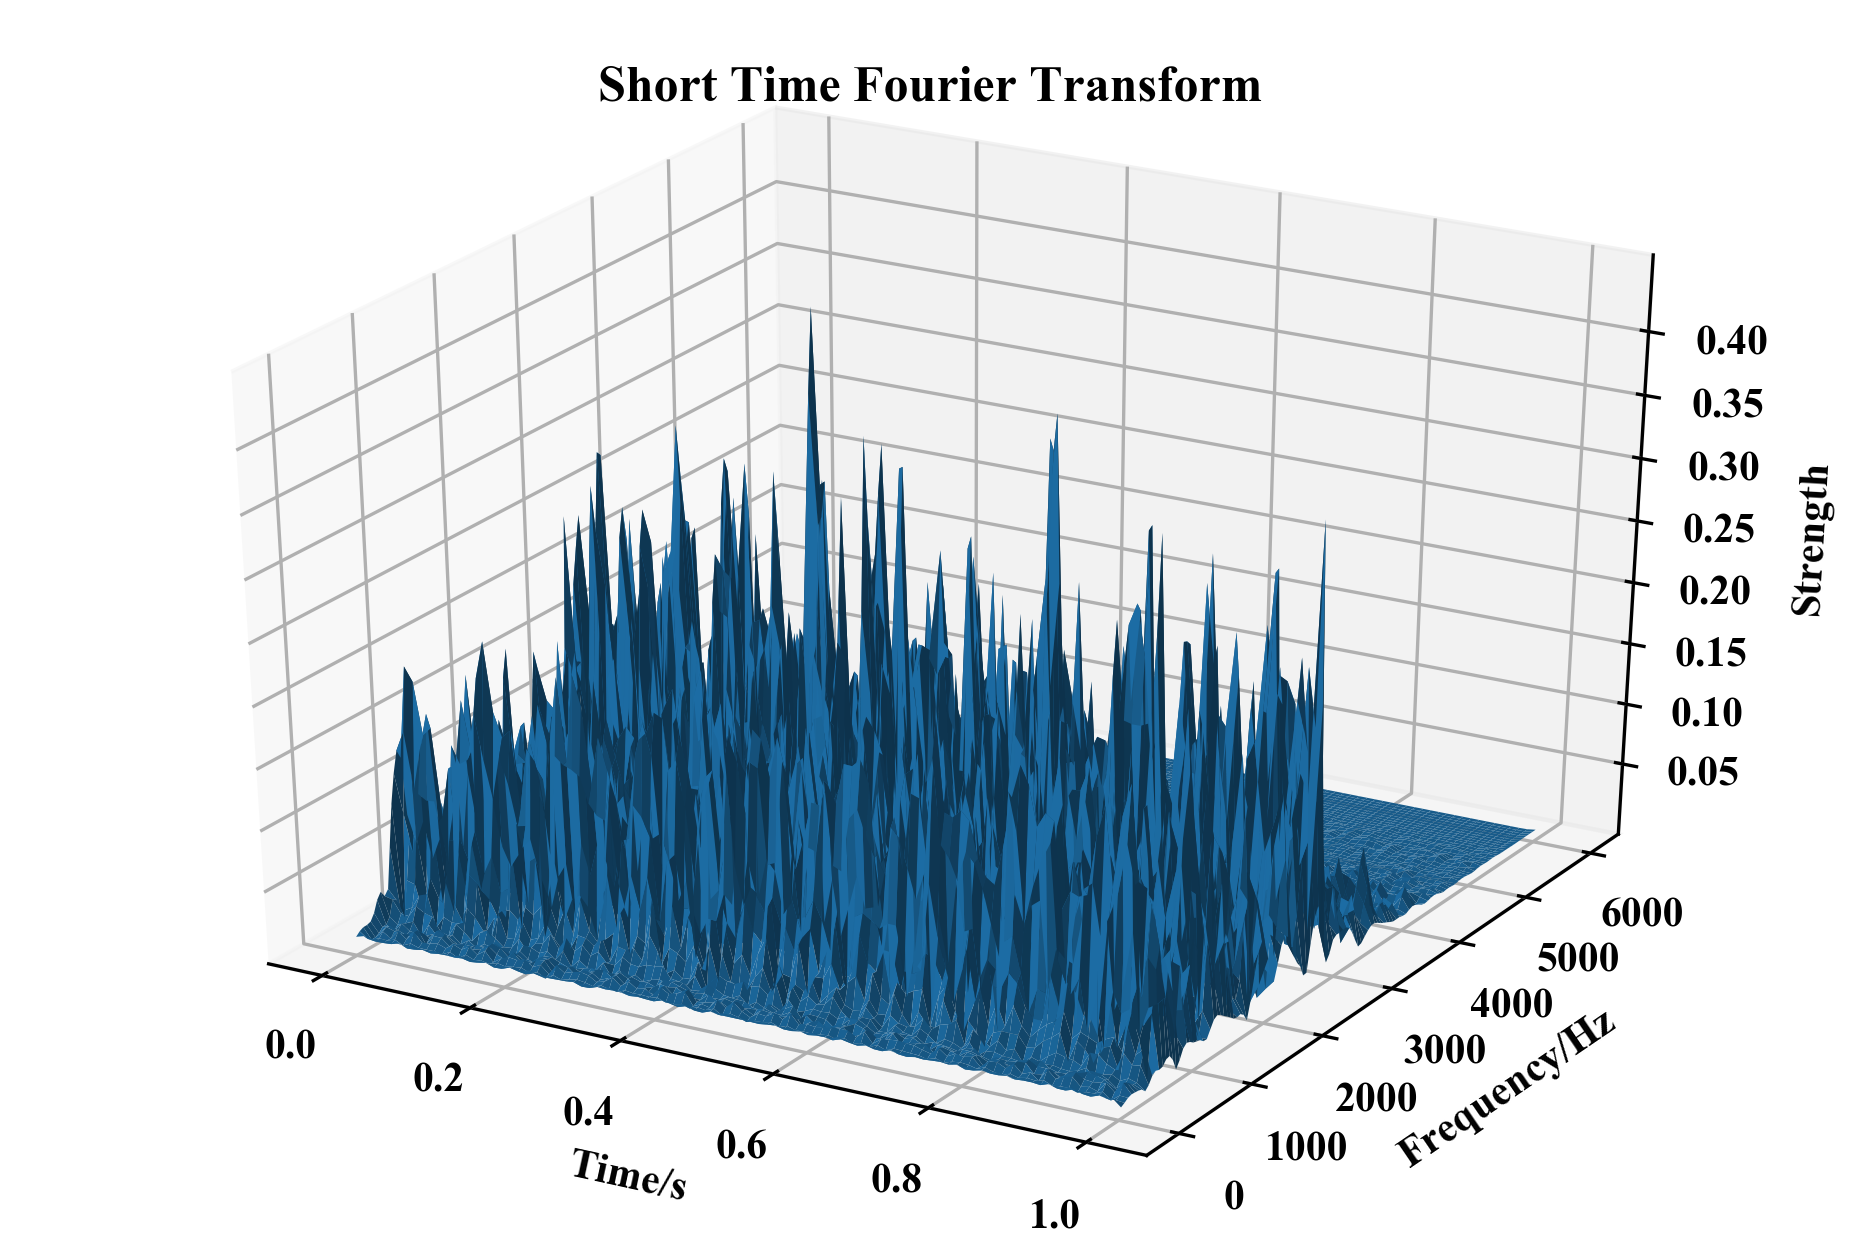

In [78]:
'''该段代码用于计算短时傅里叶变换并绘制其简单图像'''
from likefunctions_boston import plotlikeconfig
from scipy.signal import stft
from readdata import BearingDataReader
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from numpy.fft import fft
from mpl_toolkits.mplot3d import Axes3D
rder=BearingDataReader(length=12000,ratio=0.25)
f,t,z=stft(rder.X_train[0],fs=12000)
tt,ff=np.meshgrid(t,f)
fig=plt.figure(dpi=300)
ax=Axes3D(fig)
ax.plot_surface(tt,ff,abs(z),rstride=1,cstride=1)
ax.set_xlabel('Time/s')
ax.set_ylabel('Frequency/Hz')
ax.set_zlabel('Strength')
ax.set_title('Short Time Fourier Transform')
plt.show()

In [1]:
'''该部分以登高线图形式给出了时频域分布'''
from likefunctions_boston import plotlikeconfig
from scipy.signal import stft
from readdata import BearingDataReader
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from numpy.fft import fft
from mpl_toolkits.mplot3d import Axes3D
# plotlikeconfig(title='Short Time Fourier Transform',xlabel='Time/s',ylabel='Frequency/Hz')
rder=BearingDataReader(length=12000,ratio=0.25)
f,t,z=stft(rder.X_train[2:4],fs=12000)
print('over')
# plt.contourf(t,f,abs(z))
# plt.plot()

KeyboardInterrupt: 

In [5]:
'''该部分用于实行小波分解并绘图'''
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import fft,fftfreq
import numpy as np
from likefunctions_boston import plotlikeconfig
from readdata import BearingDataReader
rder=BearingDataReader(length=1200,ratio=0.25)
coeffes=pywt.dwt(rder.X_train,wavelet='haar',axis=1)signal=pywt.idwt(cA=coeffes[0],cD=None,wavelet='haar',)
fft_signal=fft(signal)
fft_frequent=fftfreq(fft_signal.size,1/12000)
# plt.plot(fft_frequent[:int(fft_signal.size/2)],abs(fft_signal[:int(fft_signal.size/2)]))
# plt.show()
# f,t,z=stft(signal,fs=12000)
f,t,z=stft(rder.X_train[0],fs=12000)
plotlikeconfig(title='Short Time Fourier Transform',xlabel='Time/s',ylabel='Frequency/Hz')
ax=plt.gca()
fig=plt.gcf()
CS=ax.contour(t,f,abs(z))
fig.colorbar(CS)
plt.plot()


KeyboardInterrupt: 

In [1]:
'''开始正式调参'''
from sklearn.linear_model import LogisticRegression
from bearclass import BearingParam
method='logistic_regression'
dataset=['stft']
# dataset=['fft']
param={}
param['solver']=['saga','sag','lbfgs','newton-cg']
# param['solver']=['sag']
param['C']=range(1,10,2)
model=LogisticRegression(class_weight='balanced',random_state=42,max_iter=10000,multi_class='multinomial',n_jobs=4)
clf={}
for idx,set in enumerate(dataset):
    clf[idx]=BearingParam(model=model,dataset=set,paramset=param,cv=3)
    clf[idx].export(set+method)
    print(set+'_'+method+'.xls is fine')

stft_logistic_regression.xls is fine


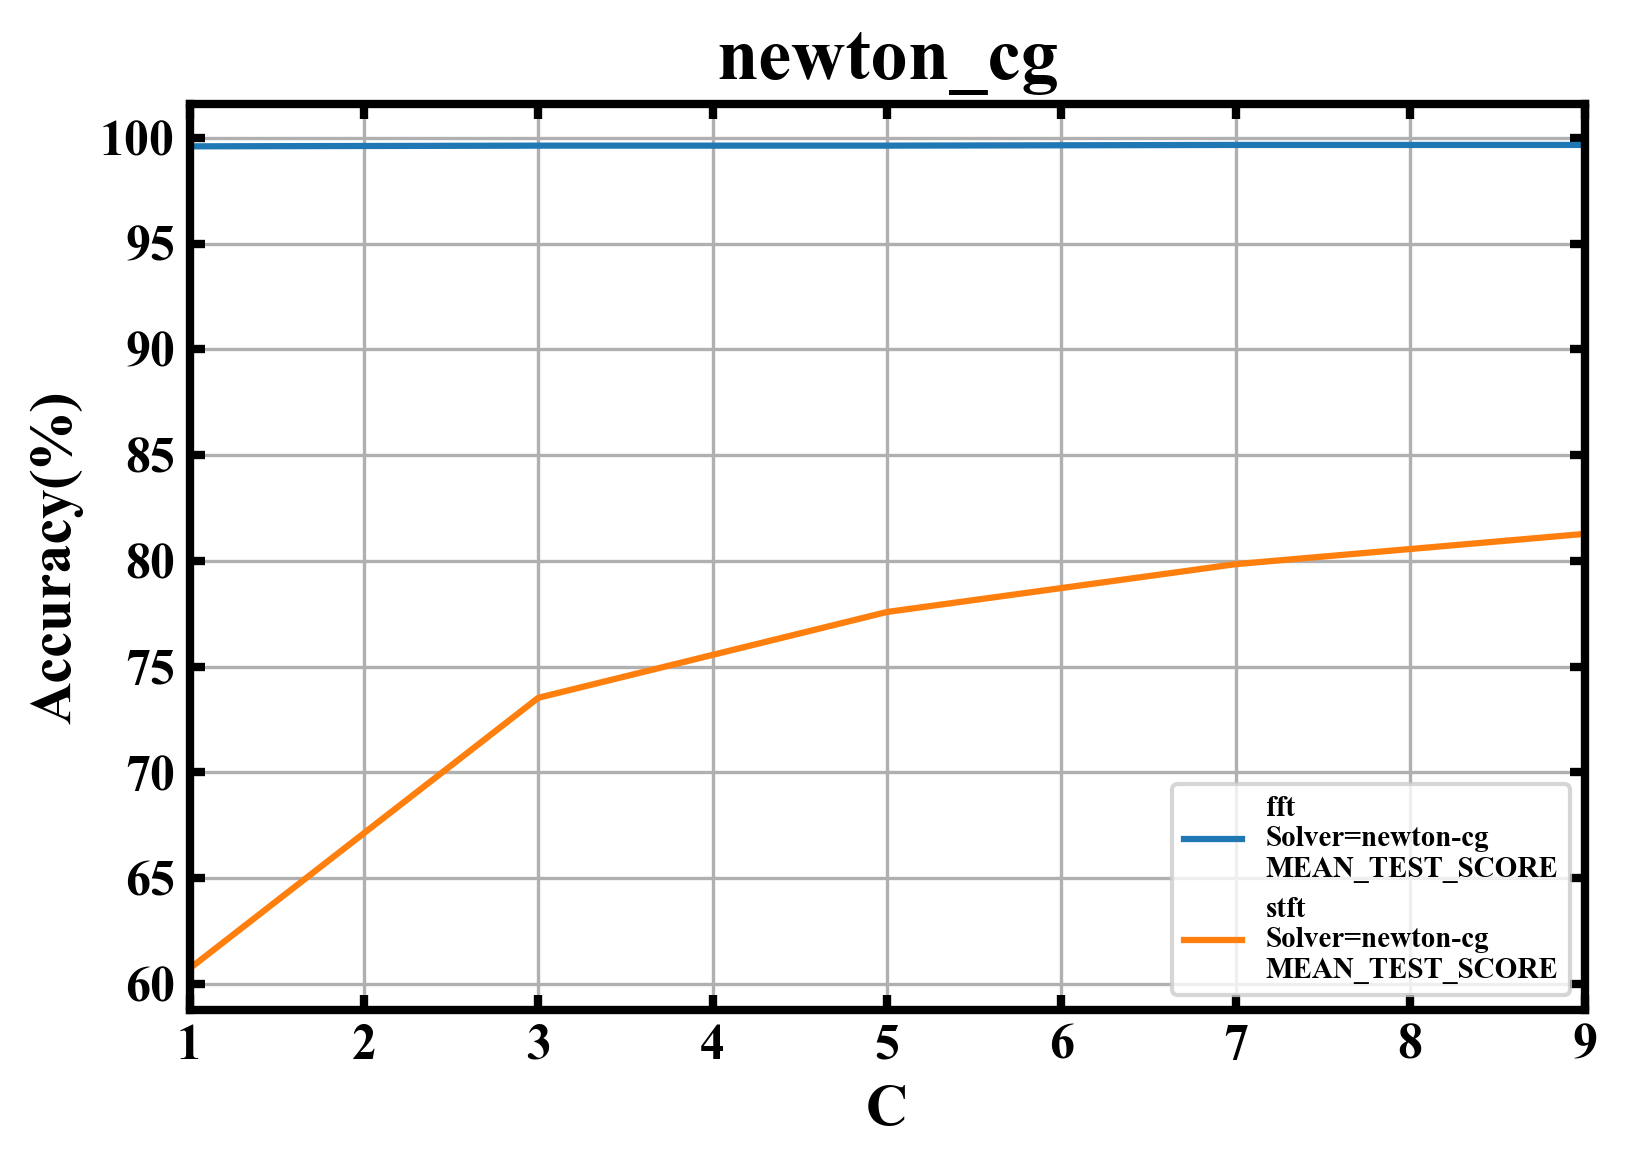

In [9]:
'''输出逻辑回归图表'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
xlabel='C'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)',title='newton_cg',dpi=300)
plt.grid()
C=['fft','stft']
xx=list(range(1,7))
for i in C:
    x,y,label_temp=linedata(name=i+'logistic_regression',xlabel=xlabel,const_param1='solver',paramvalue1='newton-cg',const_param2='solver',
            paramvalue2='newton-cg',target='mean_train_score')
    label_temp=label_temp.split('\n')
    label_temp[0]=i
    label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
    # plt.plot(x,y*100,label=label_temp)
    x,y,label_temp=linedata(name=i+'logistic_regression',xlabel=xlabel,const_param1='solver',paramvalue1='newton-cg',const_param2='solver',
            paramvalue2='newton-cg',target='mean_test_score')
    label_temp=label_temp.split('\n')
    label_temp[0]=i
    label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
    plt.plot(x,y*100,label=label_temp)
plt.xlim(min(x),max(x))
plt.legend(loc='lower right',fontsize=7)
plt.show()


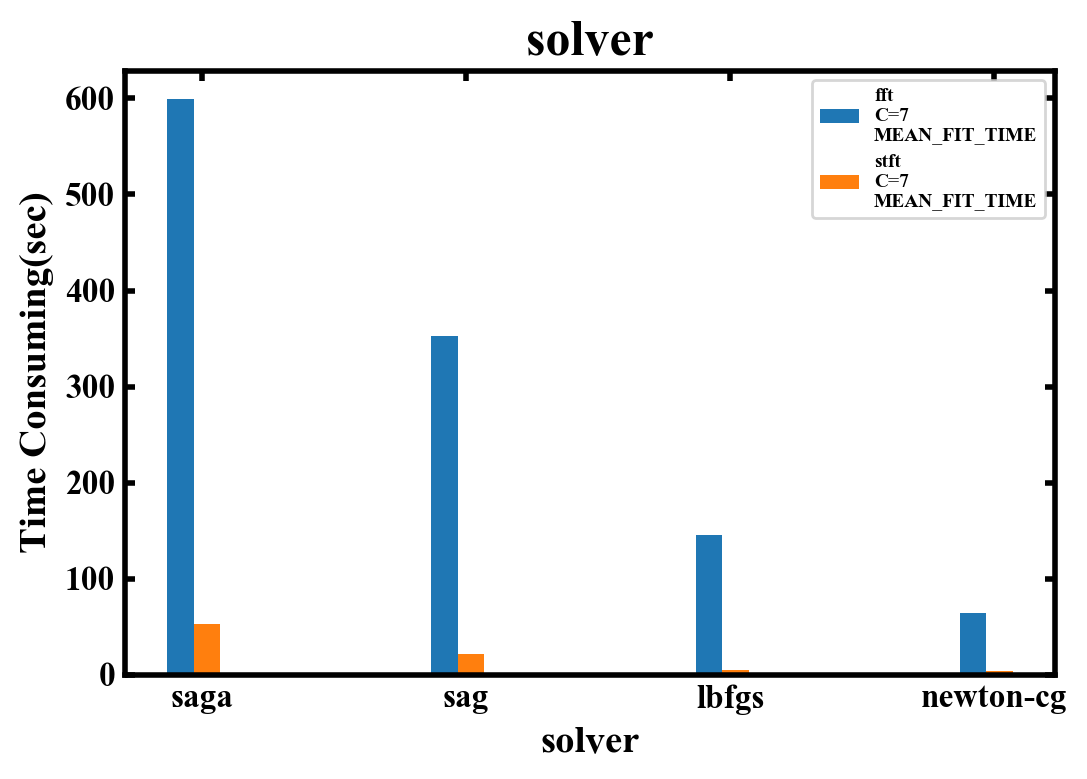

In [12]:
'''逻辑回归不同求解器的耗时'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
xlabel='solver'
plotlikeconfig(xlabel=xlabel,ylabel='Time Consuming(sec)',title='solver')
C=['fft','stft']
width=0.1
column=width
for idx,i in enumerate(C):
    x,y,label_temp=linedata(name=i+'logistic_regression',xlabel=xlabel,const_param1='C',paramvalue1=7,const_param2='C',
            paramvalue2=7,target='mean_fit_time')
    label_temp=label_temp.split('\n')
    label_temp[0]=i
    label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
    x=np.array(x)
    y=np.array(y)
    plt.bar(np.array(range(len(x)))+idx*column,y,width=width,label=label_temp)
plt.xticks(np.array(range(len(x)))+float(column*len(C))/2.5,x)
plt.tick_params(bottom=False)
plt.legend(loc='upper right',fontsize=7)
plt.show()


In [13]:
'''开始决策树正式调参'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from bearclass import BearingParam
method='DecisionTree'
dataset=['fft','stft']
# dataset=['fft']
param={}
param['criterion']=['gini','entropy']
# param['solver']=['sag']
param['max_depth']=range(1,40,1)
model=DecisionTreeClassifier(class_weight='balanced',random_state=42)
clf={}
for idx,set in enumerate(dataset):
    clf[idx]=BearingParam(model=model,dataset=set,paramset=param,cv=3)
    clf[idx].export(set+method)
    print(set+'_'+method+'.xls is fine')

C:\Users\LIKE\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\LIKE\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


fft_DecisionTree.xls is fine
stft_DecisionTree.xls is fine


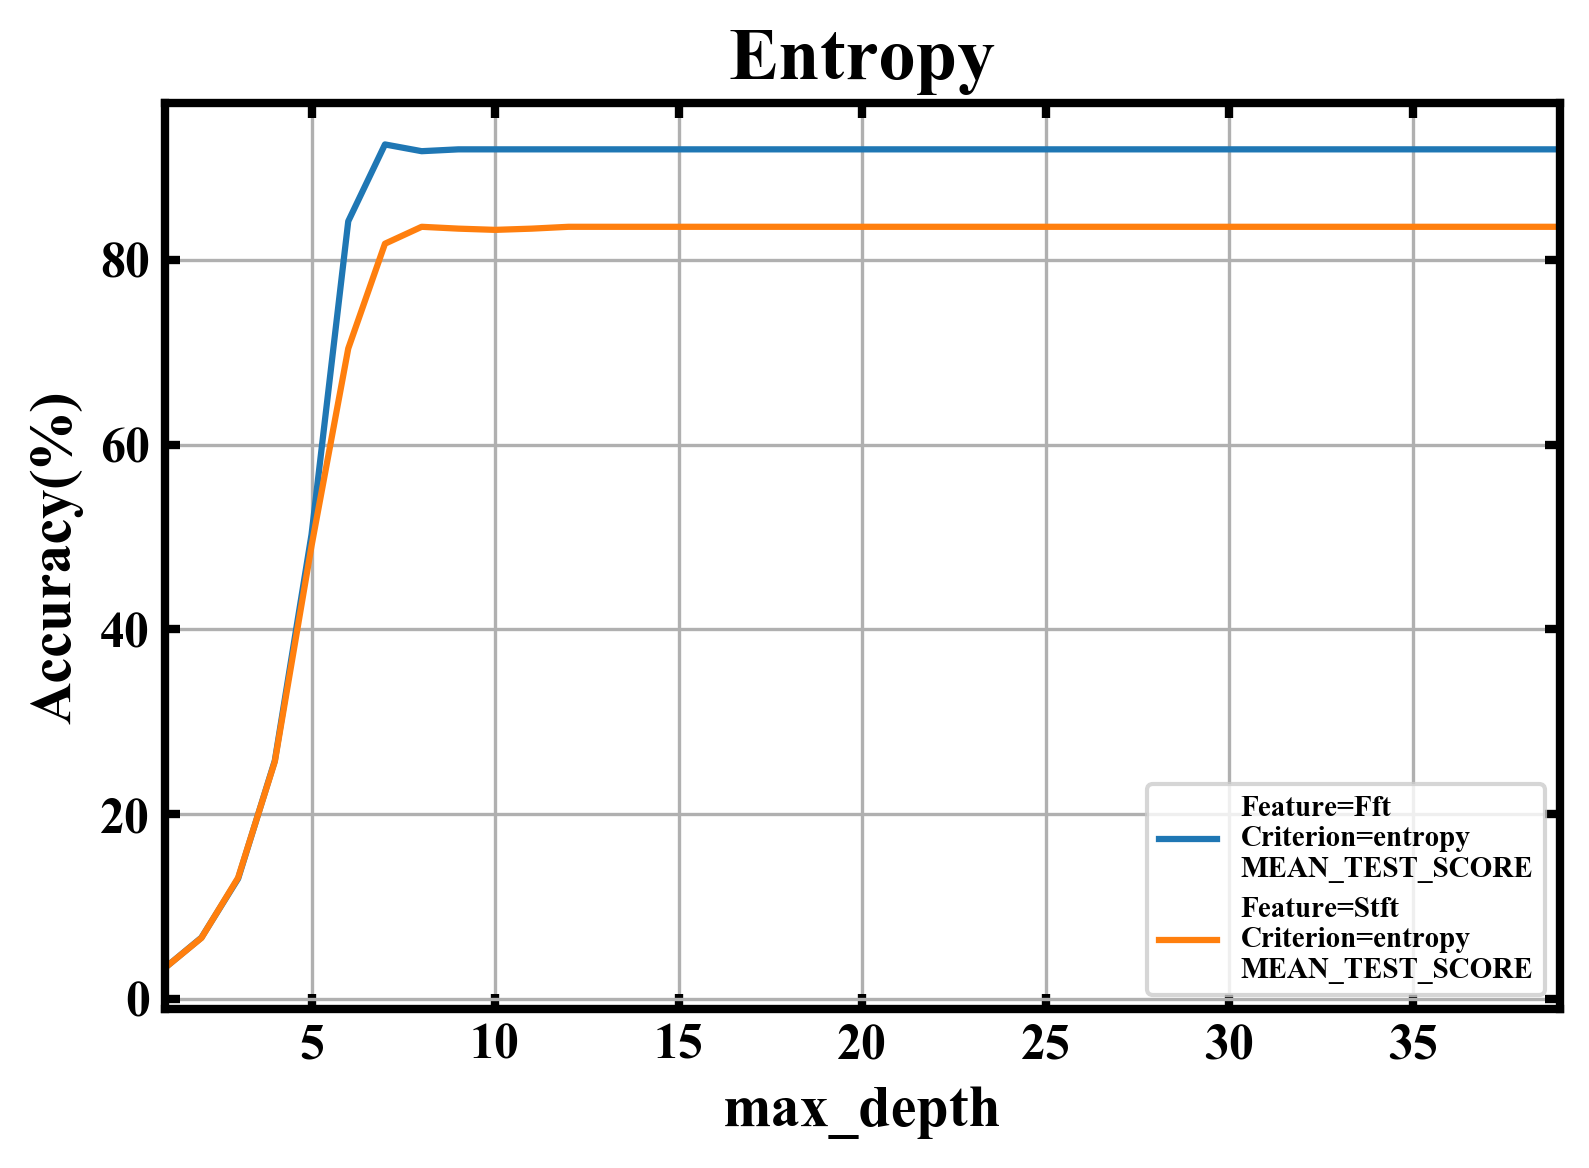

In [15]:
'''绘制数据集及最大深度对模型影响'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
xlabel='max_depth'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)',title='Entropy',dpi=300)
plt.grid()
C=['fft','stft']
xx=list(range(1,7))
for i in C:
    x,y,label_temp=linedata(name=i+'DecisionTree',xlabel=xlabel,const_param1='criterion',paramvalue1='entropy',const_param2='criterion',
            paramvalue2='entropy',target='mean_train_score')
    label_temp=label_temp.split('\n')
    label_temp[0]='Feature='+i.capitalize()
    label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
    # plt.plot(x,y*100,label=label_temp)
    x,y,label_temp=linedata(name=i+'DecisionTree',xlabel=xlabel,const_param1='criterion',paramvalue1='entropy',const_param2='criterion',
            paramvalue2='entropy',target='mean_test_score')
    label_temp=label_temp.split('\n')
    label_temp[0]='Feature='+i.capitalize()
    label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
    plt.plot(x,y*100,label=label_temp)
plt.xlim(min(x),max(x))
plt.legend(loc='lower right',fontsize=7)
plt.show()



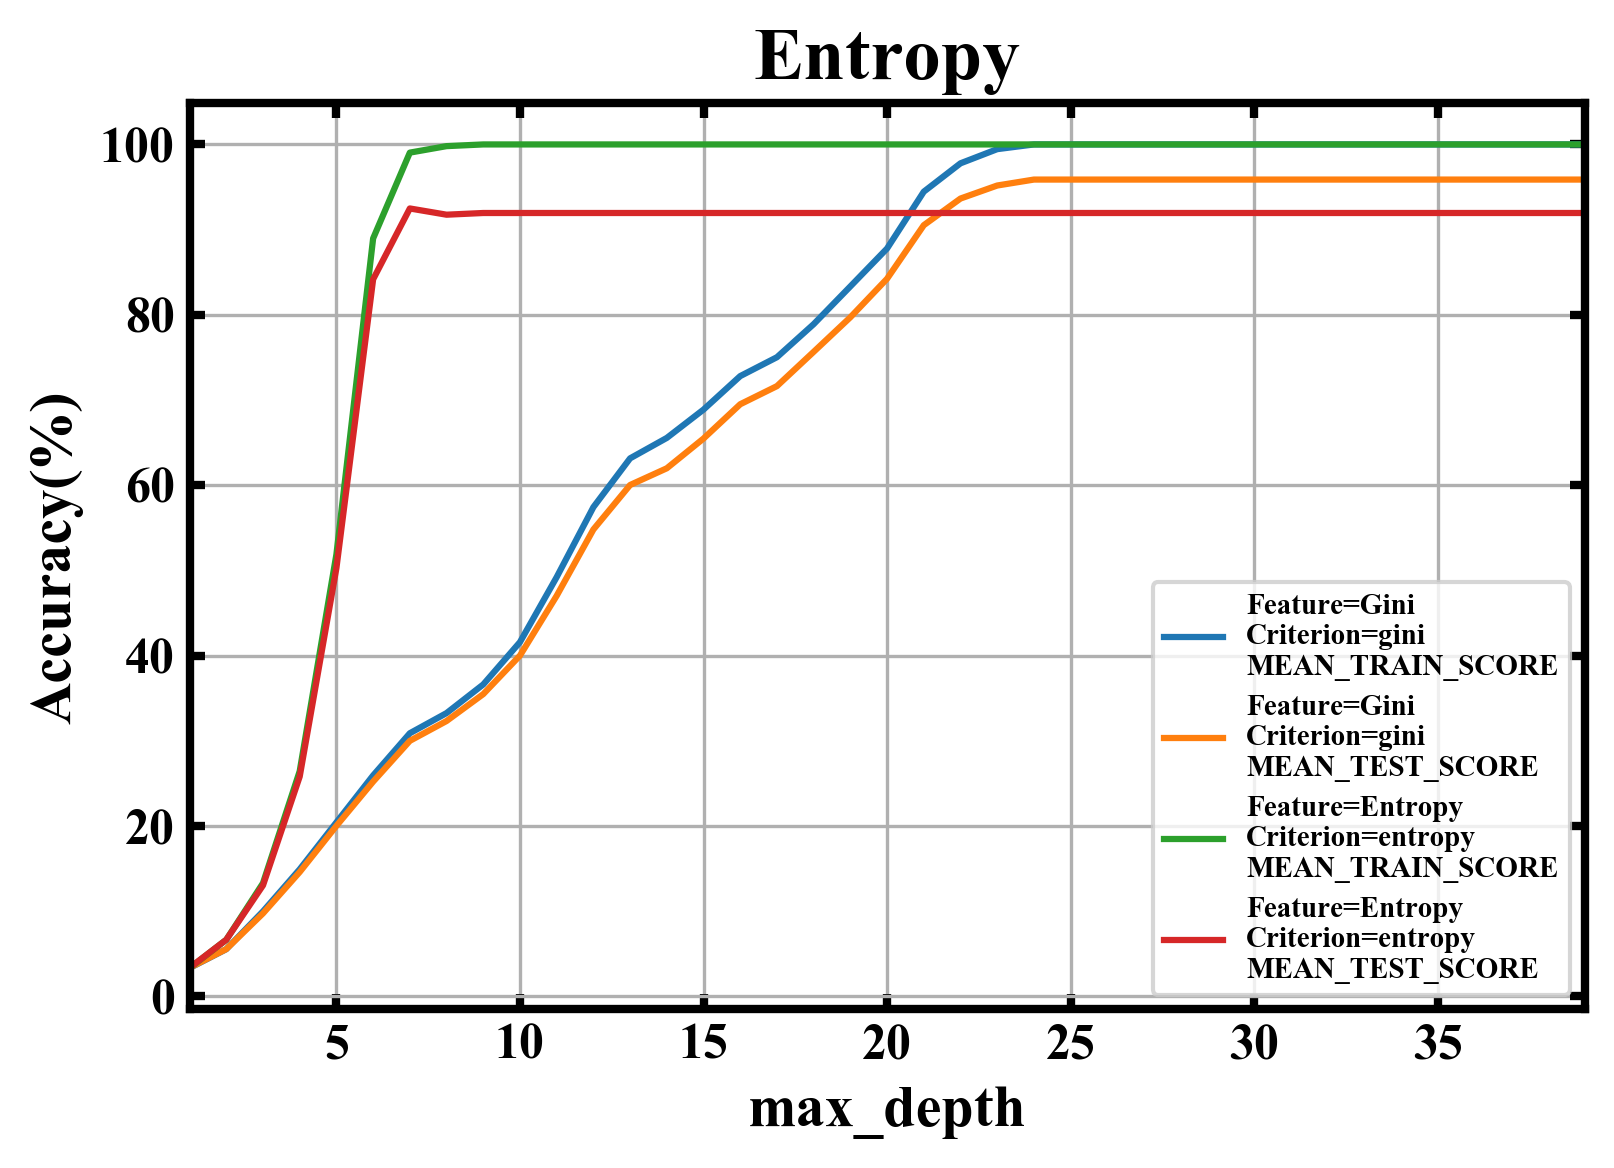

In [14]:
'''绘制决策树不同损失函数的影响'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
xlabel='max_depth'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)',title='Entropy',dpi=300)
plt.grid()
name='fft'
C=['fft','stft']
C=['gini','entropy']
xx=list(range(1,7))
for i in C:
    x,y,label_temp=linedata(name=name+'DecisionTree',xlabel=xlabel,const_param1='criterion',paramvalue1=i,const_param2='criterion',
            paramvalue2=i,target='mean_train_score')
    label_temp=label_temp.split('\n')
    label_temp[0]='Feature='+i.capitalize()
    label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
    plt.plot(x,y*100,label=label_temp)
    x,y,label_temp=linedata(name=name+'DecisionTree',xlabel=xlabel,const_param1='criterion',paramvalue1=i,const_param2='criterion',
            paramvalue2=i,target='mean_test_score')
    label_temp=label_temp.split('\n')
    label_temp[0]='Feature='+i.capitalize()
    label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
    plt.plot(x,y*100,label=label_temp)
plt.xlim(min(x),max(x))
plt.legend(loc='lower right',fontsize=7)
plt.show()



In [16]:
'''开始随机森林正式调参'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from bearclass import BearingParam
method='RandomForest'
dataset=['fft','stft']
# dataset=['fft']
param={}
param['n_estimators']=range(10,200,30)
# param['solver']=['sag']
param['max_depth']=range(10,50,10)
model=RandomForestClassifier(class_weight='balanced',random_state=42,n_jobs=4)
clf={}
for idx,set in enumerate(dataset):
    clf[idx]=BearingParam(model=model,dataset=set,paramset=param,cv=3)
    clf[idx].export(set+method)
    print(set+'_'+method+'.xls is fine')


fft_RandomForest.xls is fine
stft_RandomForest.xls is fine


C:\Users\LIKE\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


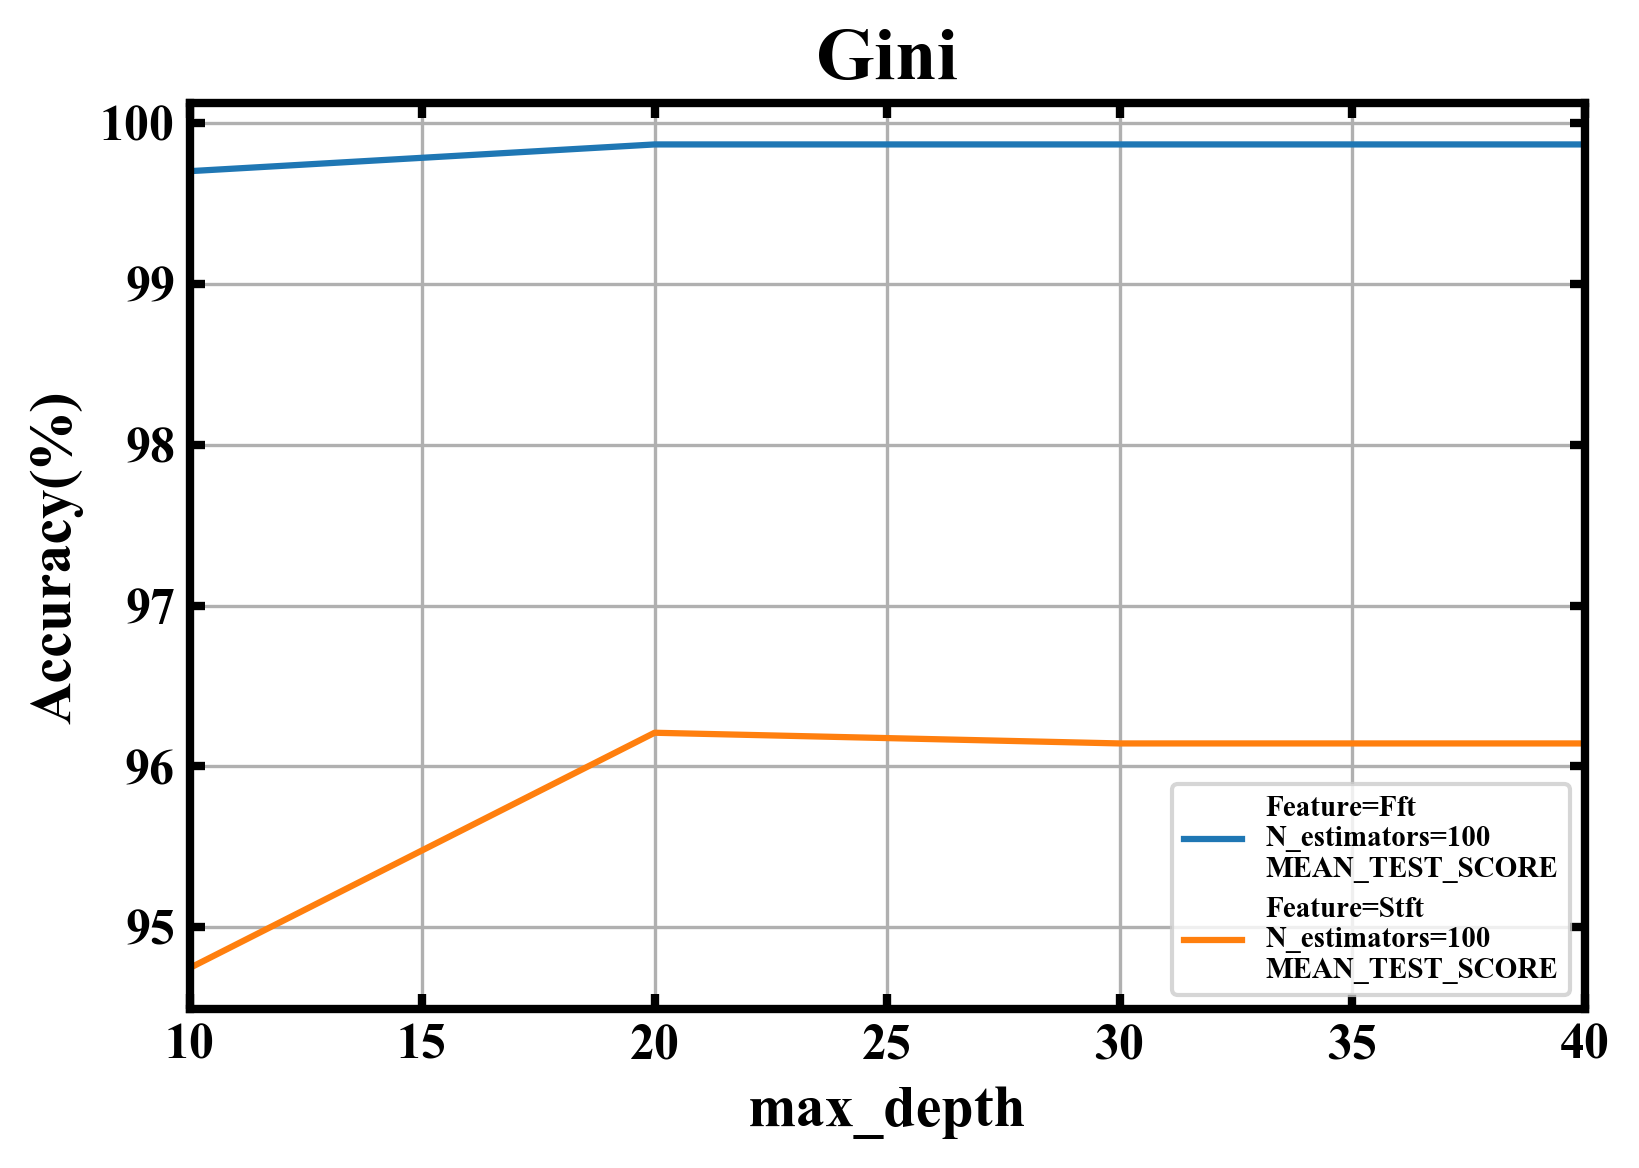

In [27]:
'''绘制数据集及最大深度对模型影响'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
xlabel='max_depth'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)',title='Gini',dpi=300)
plt.grid()
C=['fft','stft']
for i in C:
    x,y,label_temp=linedata(name=i+'RandomForest',xlabel=xlabel,const_param1='n_estimators',paramvalue1=100,const_param2='n_estimators',
            paramvalue2=100,target='mean_train_score')
    label_temp=label_temp.split('\n')
    label_temp[0]='Feature='+i.capitalize()
    label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
    # plt.plot(x,y*100,label=label_temp)
    x,y,label_temp=linedata(name=i+'RandomForest',xlabel=xlabel,const_param1='n_estimators',paramvalue1=100,const_param2='n_estimators',
            paramvalue2=100,target='mean_test_score')
    label_temp=label_temp.split('\n')
    label_temp[0]='Feature='+i.capitalize()
    label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
    plt.plot(x,y*100,label=label_temp)
plt.xlim(min(x),max(x))
plt.legend(loc='lower right',fontsize=7)
plt.show()

In [28]:
'''开始XGBoost正式调参'''
from xgboost import XGBClassifier
from bearclass import BearingParam
method='XGBClassifier'
dataset=['fft','stft']
# dataset=['fft']
param={}
param['n_estimators']=range(10,200,30)
# param['solver']=['sag']
param['max_depth']=range(10,50,10)
model=XGBClassifier(class_weight='balanced',random_state=42,n_jobs=4)
clf={}
for idx,set in enumerate(dataset):
    clf[idx]=BearingParam(model=model,dataset=set,paramset=param,cv=3)
    clf[idx].export(set+method)
    print(set+'_'+method+'.xls is fine')

fft_XGBClassifier.xls is fine
stft_XGBClassifier.xls is fine


C:\Users\LIKE\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


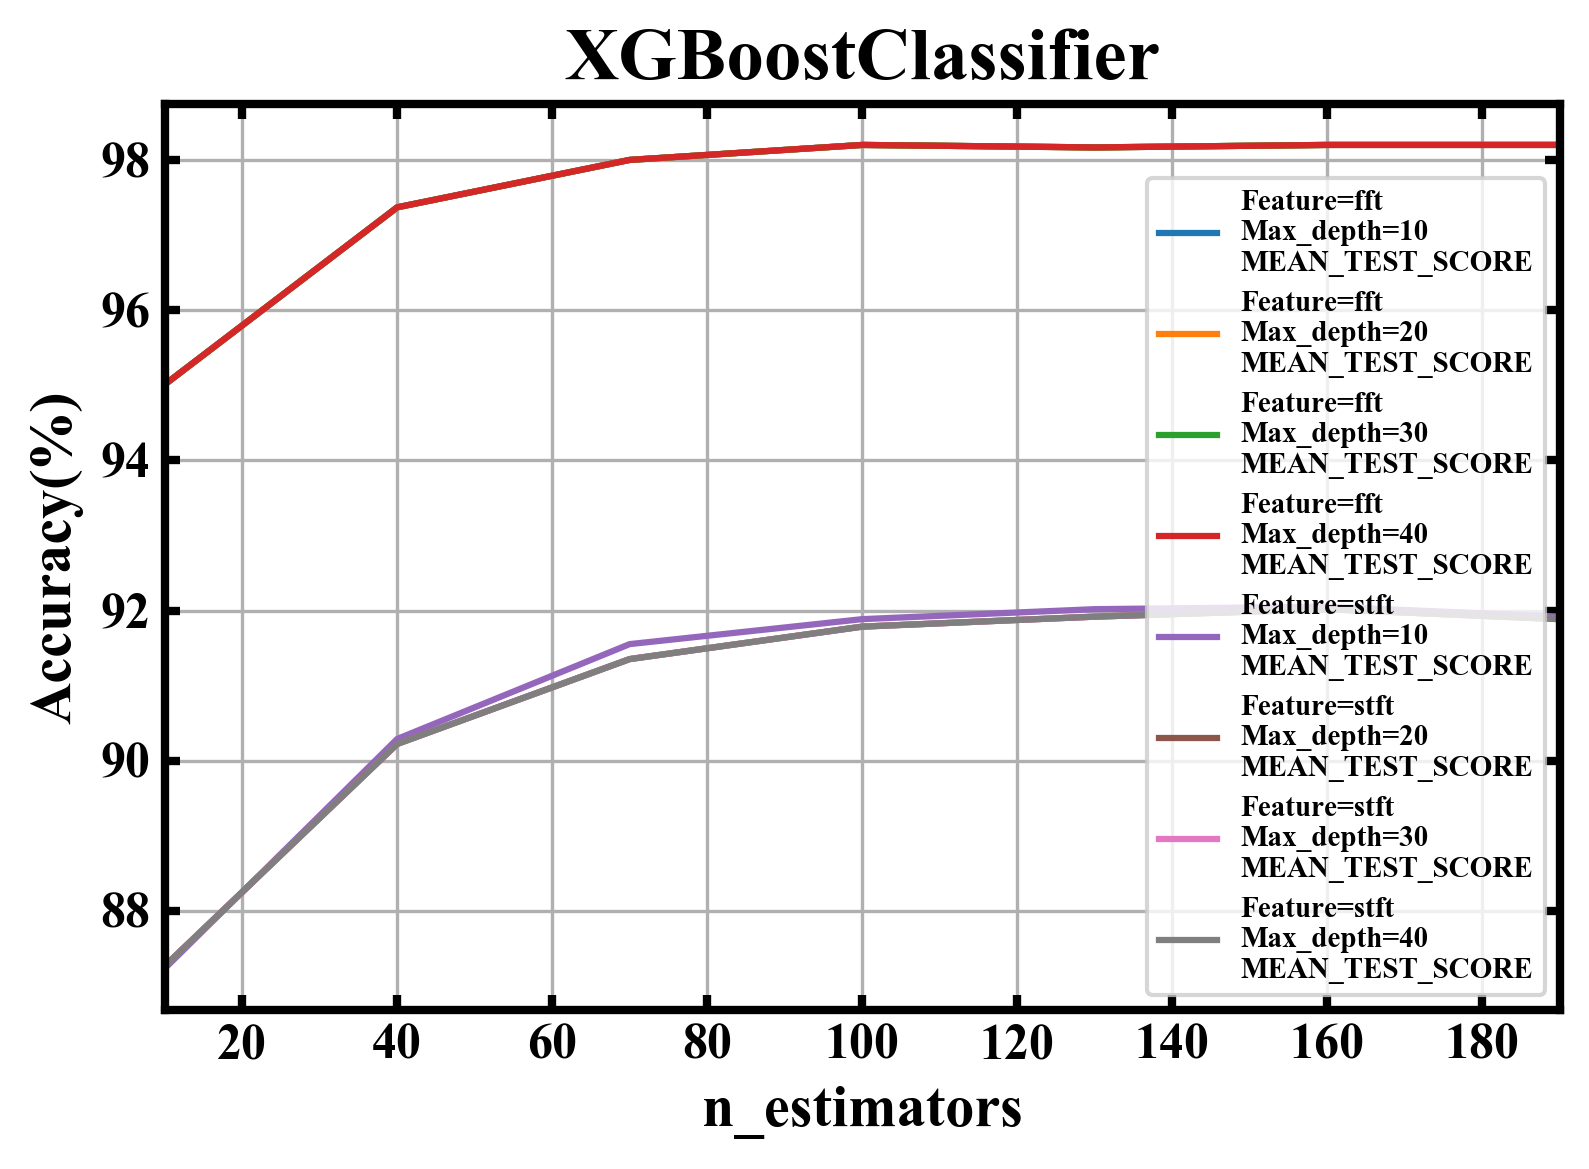

In [5]:
'''对XGBoost分类模型进行评判'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
xlabel='n_estimators'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)',title='XGBoostClassifier',dpi=300)
plt.grid()
C=range(10,50,10)
name='fft'
for name in ['fft','stft']:
    for i in C:
        x,y,label_temp=linedata(name=name+'XGBClassifier',xlabel=xlabel,const_param1='max_depth',paramvalue1=i,const_param2='max_depth',
                paramvalue2=i,target='mean_train_score')
        label_temp=label_temp.split('\n')
        label_temp[0]='Feature='+name
        label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
        # plt.plot(x,y*100,label=label_temp)
        x,y,label_temp=linedata(name=name+'XGBClassifier',xlabel=xlabel,const_param1='max_depth',paramvalue1=i,const_param2='max_depth',
                paramvalue2=i,target='mean_test_score')
        label_temp=label_temp.split('\n')
        label_temp[0]='Feature='+name
        label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
        plt.plot(x,y*100,label=label_temp)
plt.xlim(min(x),max(x))
plt.legend(loc='lower right',fontsize=7)
plt.show()



In [2]:
'''开始支持向量机正式调参'''
from sklearn.svm import SVC
from bearclass import BearingParam
method='SVC'
dataset=['fft','stft']
# dataset=['fft']
param={}
param['C']=range(1,10)
# param['solver']=['sag']
param['kernel']=['rbf','linear','poly','sigmoid']
model=SVC(class_weight='balanced',random_state=42)
clf={}
for idx,set in enumerate(dataset):
    clf[idx]=BearingParam(model=model,dataset=set,paramset=param,cv=3)
    clf[idx].export(set+method)
    print(set+'_'+method+'.xls is fine')

C:\Users\LIKE\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\LIKE\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


fft_SVC.xls is fine
stft_SVC.xls is fine


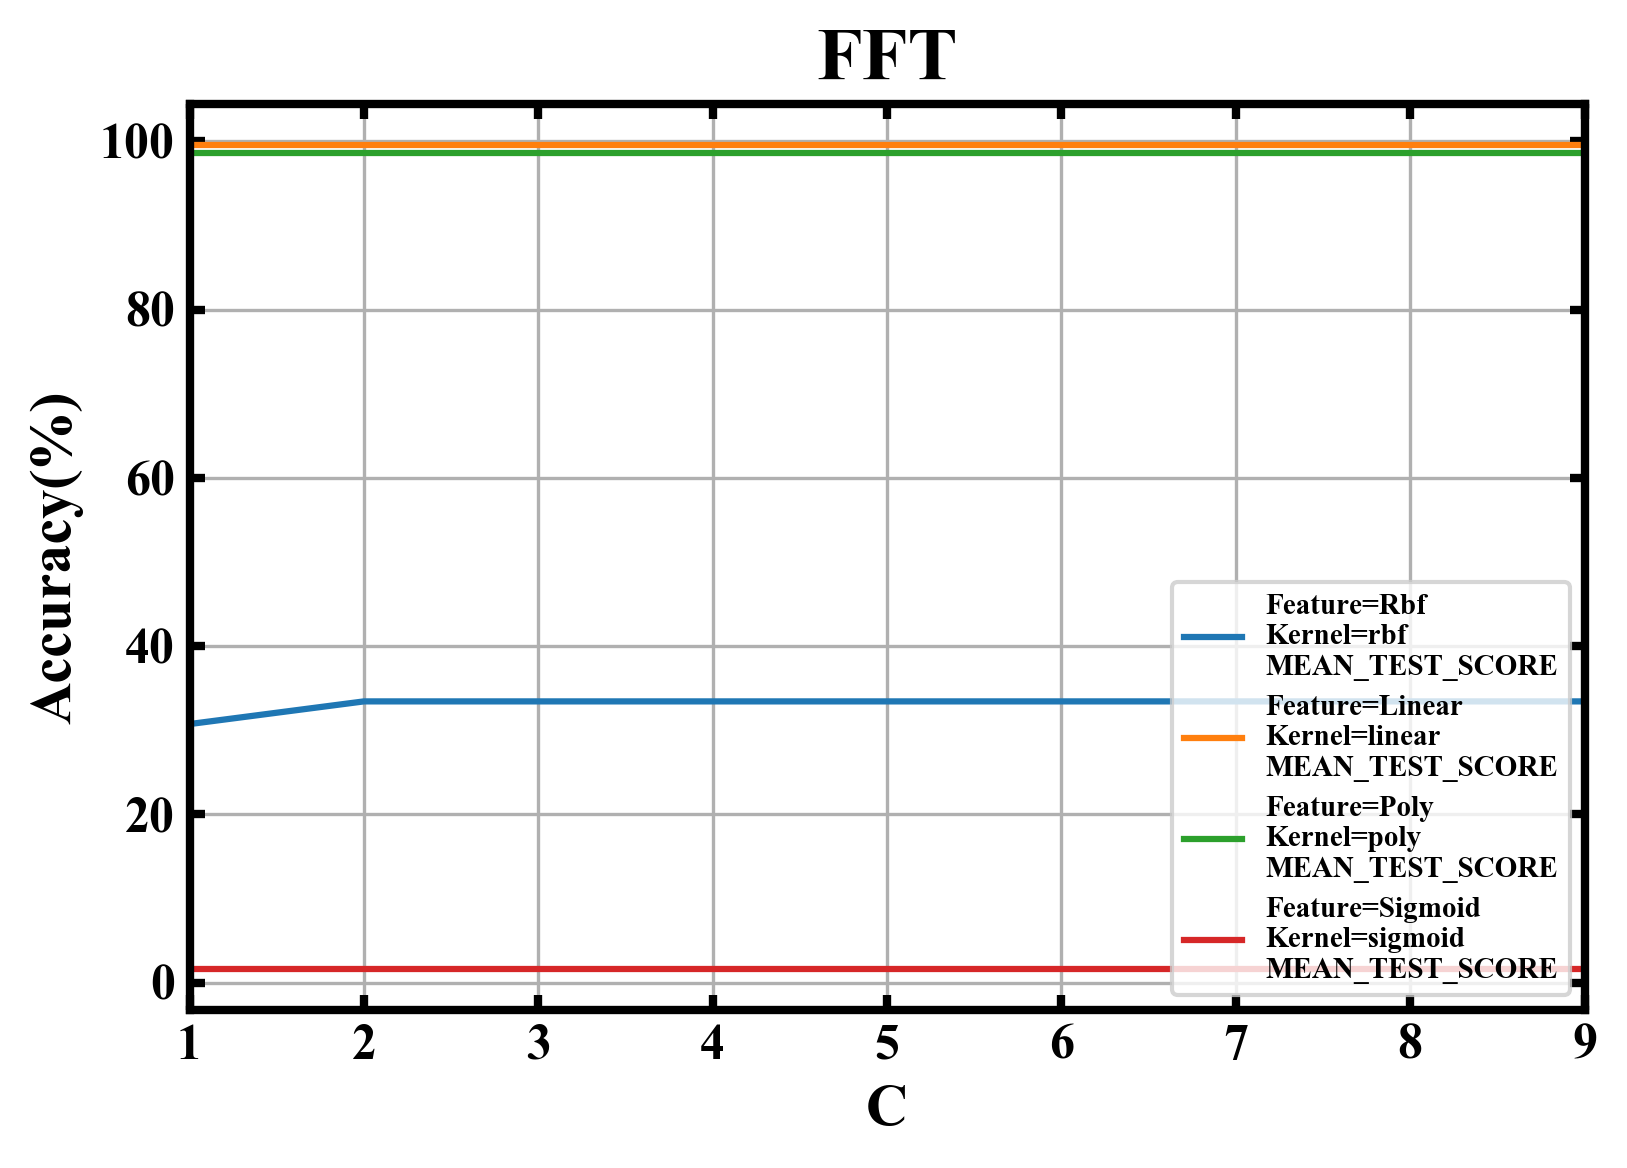

In [4]:
'''SVM绘图'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
xlabel='C'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)',title='FFT',dpi=300)
plt.grid()
name='fft'
C=['rbf','linear','poly','sigmoid']
for i in C:
    x,y,label_temp=linedata(name=name+'SVC',xlabel=xlabel,const_param1='kernel',paramvalue1=i,const_param2='kernel',
            paramvalue2=i,target='mean_train_score')
    label_temp=label_temp.split('\n')
    label_temp[0]='Feature='+i.capitalize()
    label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
    # plt.plot(x,y*100,label=label_temp)
    x,y,label_temp=linedata(name=name+'SVC',xlabel=xlabel,const_param1='kernel',paramvalue1=i,const_param2='kernel',
            paramvalue2=i,target='mean_test_score')
    label_temp=label_temp.split('\n')
    label_temp[0]='Feature='+i.capitalize()
    label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
    plt.plot(x,y*100,label=label_temp)
plt.xlim(min(x),max(x))
plt.legend(loc='lower right',fontsize=7)
plt.show()

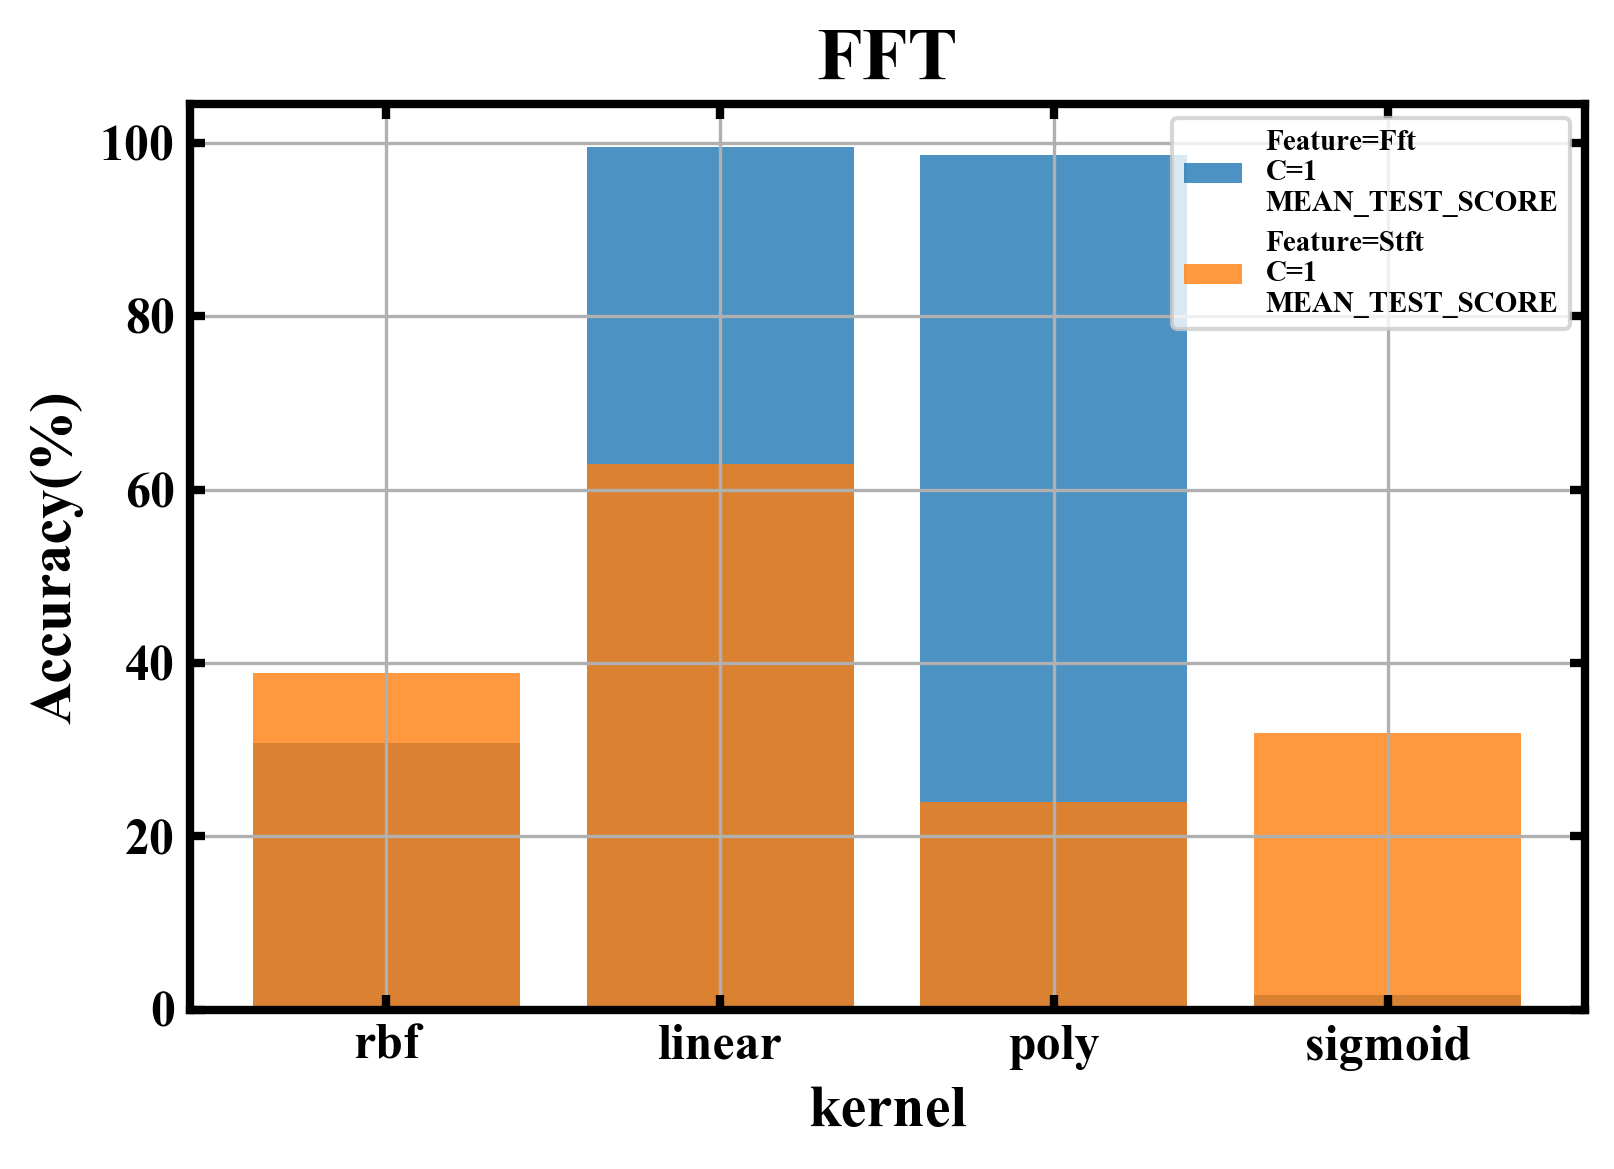

In [11]:

'''SVM针对数据集绘图'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
xlabel='kernel'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)',title='FFT',dpi=300)
plt.grid()
C=['fft','stft']
for i in C:
    x,y,label_temp=linedata(name=i+'SVC',xlabel=xlabel,const_param1='C',paramvalue1=1,const_param2='C',
            paramvalue2=1,target='mean_train_score')
    label_temp=label_temp.split('\n')
    label_temp[0]='Feature='+i.capitalize()
    label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
    # plt.plot(x,y*100,label=label_temp)
    x,y,label_temp=linedata(name=i+'SVC',xlabel=xlabel,const_param1='C',paramvalue1=1,const_param2='C',
            paramvalue2=1,target='mean_test_score')
    label_temp=label_temp.split('\n')
    label_temp[0]='Feature='+i.capitalize()
    label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
    plt.bar(x,y*100,label=label_temp,alpha=0.8)
# plt.xlim(min(x),max(x))
plt.legend(loc='upper right',fontsize=7)
plt.show()

In [2]:
'''开始支持向量机正式调参'''
from sklearn.neural_network import MLPClassifier
from bearclass import BearingParam
method='MLPClassifier'
dataset=['fft','stft']
# dataset=['fft']
param={}
param['activation']=['relu','identity','logistic','tanh']
# param['solver']=['sag']
param['hidden_layer_sizes']=[[int(150*0.8**j) for j in range(1,i+1) ] for i in range(2,7)]
model=MLPClassifier(random_state=42)
clf={}
for idx,set in enumerate(dataset):
    clf[idx]=BearingParam(model=model,dataset=set,paramset=param,cv=3)
    clf[idx].export(set+method)
    print(set+'_'+method+'.xls is fine')

C:\Users\LIKE\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\LIKE\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\LIKE\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\LIKE\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum i

fft_MLPClassifier.xls is fine
stft_MLPClassifier.xls is fine


In [ ]:
'''多层感知机性能绘图'''
from likefunctions_boston import plotlikeconfig
from MNIST_HELLOWORLD.likedigitclass import linedata
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
xlabel='hidden_layer_sizes'
plotlikeconfig(xlabel=xlabel,ylabel='Accuracy(%)',title='FFT',dpi=300)
plt.grid()
name='fft'
C=['relu','tanh','identity','logistic']
for i in C:
    x,y,label_temp=linedata(name=name+'MLPClassifier',xlabel=xlabel,const_param1='activation',paramvalue1=i,const_param2='activation',
            paramvalue2=i,target='mean_train_score')
    label_temp=label_temp.split('\n')
    label_temp[0]='Feature='+i.capitalize()
    label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
    # plt.plot(x,y*100,label=label_temp)
    x,y,label_temp=linedata(name=name+'MLPClassifier',xlabel=xlabel,const_param1='activation',paramvalue1=i,const_param2='activation',
            paramvalue2=i,target='mean_test_score')
    label_temp=label_temp.split('\n')
    label_temp[0]='Feature='+i.capitalize()
    label_temp=label_temp[0]+'\n'+label_temp[1]+'\n'+label_temp[2]
    plt.plot(y*100,label=label_temp)
xx=range(len(x))
plt.xlim(min(xx),max(xx))
plt.legend(loc='lower right',fontsize=7)
plt.show()

